# CIDAUT AI Fake Scene Classification 2024

---
author: Brice Piaple Dada
date: December 21, 2024
---

## Unzip the data

In [23]:
import zipfile

# Path to the .zip file
zip_file_path = 'Data/cidaut-ai-fake-scene-classification-2024.zip'

# Path toi extract teh contents
extract_path = 'Data/Unzip_data'

# Open the .zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip:
    zip.extractall(extract_path)
    
    print("Extractiob Complete.")


Extractiob Complete.


## Import our libraries

In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder

2024-12-25 20:18:56.179140: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-25 20:18:56.326919: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735175936.391366   18752 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735175936.410400   18752 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-25 20:18:56.540889: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## Load our data

###  Load our csv and images files

In [1]:
csv_path = 'Data/Unzip_data/train.csv'
batch_size = 32

In [2]:
def preprocess_image(image_path: str, label, image_size=(224, 224)):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, image_size)
    img = img / 255.0
    return img, label

In [14]:
images_paths = 'Data/Unzip_data/Train'
df = pd.read_csv(csv_path)
df['image'] = df['image'].apply(lambda x: os.path.join(images_paths, x))
file_paths = df['image'].values
labels = df['label'].values

ds_train = tf.data.Dataset.from_tensor_slices((file_paths, labels))

ds_train = ds_train.map(preprocess_image).batch(batch_size)

In [8]:
def create_model(input_shape=(224, 224, 3), num_classes=1):
    """Creates a CNN model using the Sequential API.
    
    Args:
        input_shape (tuple, optional): The shape of the input data. Defaults to (224, 224, 3).
        num_classes (int, optional): The number of output classes. Defaults to 5.
    
    Returns:
        tf.keras.Model: An EfficientB0 fine tunned model.
    """
    
    # Create a base model
    base_model = tf.keras.applications.EfficientNetB0(include_top=False)
    base_model.trainable = False
    
    # Create a Sequential model
    model = tf.keras.models.Sequential([
        # tf.keras.layers.Rescaling(1./255, input_shape=input_shape),
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(num_classes, activation='sigmoid')
    ])
    
    # Compile the model
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

In [9]:
# Create a model and check its details
model = create_model(num_classes=1)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, None, None,     │     4,049,571 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,050,852 (15.45 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

## Fit the model

In [15]:
# 5. Usage Example
csv_file_path = 'Data/Unzip_data/train.csv'
image_folder_path = 'Data/Unzip_data/Train'
batch_size = 32
image_size = (224, 224)

# Encode the labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Update the dataset with encoded labels
ds_train = tf.data.Dataset.from_tensor_slices((file_paths, encoded_labels))
ds_train = ds_train.map(preprocess_image).batch(batch_size)

# Create and compile the model
model = create_model(num_classes=1)
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(ds_train, epochs=5)

Epoch 1/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 375ms/step - accuracy: 0.5469 - loss: 0.6907
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 365ms/step - accuracy: 0.5488 - loss: 0.6917
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 365ms/step - accuracy: 0.5434 - loss: 0.6927
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 368ms/step - accuracy: 0.5435 - loss: 0.6903
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 356ms/step - accuracy: 0.5480 - loss: 0.6902



## Plot the training curves


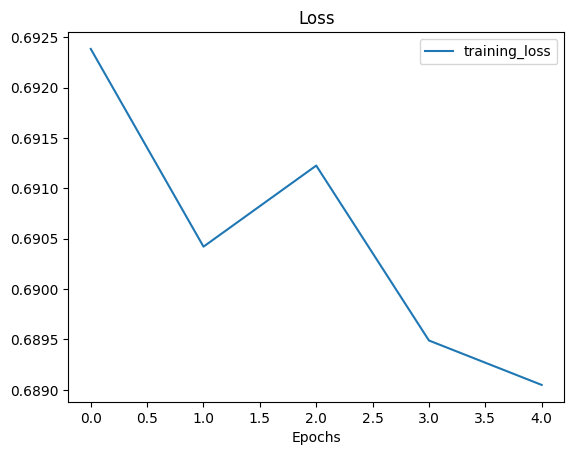

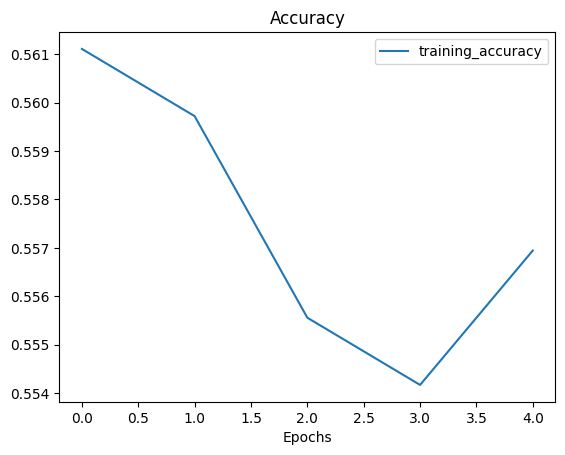

In [16]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
    """Plots the loss and accuracy curves for the training and validation sets.
    
    Args:
        history (History): The history object returned from model training.
    """
    
    # Get the loss and accuracy metrics
    loss = history.history['loss']
    accuracy = history.history['accuracy']
    
    # Check if validation data is available
    val_loss = history.history.get('val_loss')
    val_accuracy = history.history.get('val_accuracy')
    
    # Get the number of epochs
    epochs = range(len(history.history['loss']))
    
    # Plot the loss
    plt.figure()
    plt.plot(epochs, loss, label='training_loss')
    if val_loss is not None:
        plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    # Plot the accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    if val_accuracy is not None:
        plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    
    plt.show()
    
plot_loss_curves(history)


In [18]:
def preprocess_single_image(image_path, image_size=(224, 224)):
  """Preprocesses a single image for prediction.

  Args:
    image_path: Path to the image file.
    image_size: Tuple (height, width) for resizing.

  Returns:
    A preprocessed image tensor ready for the model.
  """
  img = tf.io.read_file(image_path)
  img = tf.image.decode_jpeg(img, channels=3)  # Use decode_png if needed
  img = tf.image.resize(img, image_size)
  img = img / 255.0  # Normalize (make sure this matches your training preprocessing)
  img = tf.expand_dims(img, axis=0)  # Add a batch dimension
  return img

In [19]:
def predict_image(model, image_path, image_size=(224, 224)):
  """Makes a prediction on a single image.

  Args:
    model: The trained TensorFlow model.
    image_path: Path to the image file.
    image_size: Tuple (height, width) for resizing.

  Returns:
    The predicted probability (output of the sigmoid).
  """
  img = preprocess_single_image(image_path, image_size)
  prediction = model.predict(img)
  return prediction[0][0]  # Extract the probability from the batch

In [20]:
def interpret_prediction(prediction, threshold=0.5):
  """Interprets the prediction based on a threshold.

  Args:
    prediction: The predicted probability (output of the sigmoid).
    threshold: The threshold for determining the class.

  Returns:
    The predicted class label (0 or 1).
  """
  if prediction >= threshold:
    return 1  # Class 1
  else:
    return 0  # Class 0

In [21]:
# Path to the image you want to classify
image_path = 'Data/Unzip_data/Train/876.jpg'
image_size = (224, 224)

# Make the prediction
prediction = predict_image(model, image_path, image_size)

# Interpret the prediction
predicted_class = interpret_prediction(prediction)

# Get the class name based on numerical label:
label_map = {0: 'Class 0 label', 1: 'Class 1 label'} # Example: {0: 'cat', 1: 'dog'}
predicted_class_name = label_map[predicted_class]

print(f"Predicted probability: {prediction}")
print(f"Predicted class: {predicted_class} ({predicted_class_name})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted probability: 0.5680572390556335
Predicted class: 1 (Class 1 label)


In [24]:
# Use image_paths as batch_image_paths
batch_image_paths = file_paths[:32]

# Create a DataFrame with the image names and their predicted classes
test_image_names = [os.path.splitext(os.path.basename(file_path))[0] for file_path in batch_image_paths]
test_predictions = [interpret_prediction(predict_image(model, file_path)) for file_path in batch_image_paths]

test_results = pd.DataFrame({
    'Image': test_image_names,
    'Label': test_predictions
})


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━

In [26]:
test_results

,Image,Label
0,1,1
1,2,1
2,3,1
3,6,1
4,8,1
5,9,1
6,10,1
7,11,1
8,12,1
9,13,1


In [21]:
## Save the predictions to a CSV file

test_results.to_csv('Data/Unzip_data/test_predictions.csv', index=False)

In [ ]:
# Visualise the model
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)


"dot" with args ['-Tpng', '/tmp/tmpl3q9xkki/tmpcabte_ii'] returned code: -6

stdout, stderr:
 b''
b"failed at node 7706[1]\ndot: maze.c:313: chkSgraph: Assertion `np->cells[1]' failed.\n"



AssertionError: "dot" with args ['-Tpng', '/tmp/tmpl3q9xkki/tmpcabte_ii'] returned code: -6

In [285]:
!pip install pydot